# Analysis

In [6]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
os.environ["CDF_LIB"] = "~/CDF/lib"
from spacepy import pycdf
# https://spacepy.github.io/pycdf.html

In [3]:
pycdf

<module 'spacepy.pycdf' from '/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py'>

## Import spacepy, example use

In [4]:
from spacepy import pycdf
import datetime
time = [datetime.datetime(2000, 10, 1, 1, val) for val in range(60)]
import numpy as np
data = np.random.random_sample(len(time))
cdf = pycdf.CDF('MyCDF.cdf', '')
cdf['Epoch'] = time
cdf['data'] = data
cdf.attrs['Author'] = 'John Doe'
cdf.attrs['CreateDate'] = datetime.datetime.now()
cdf['data'].attrs['units'] = 'MeV'
cdf.close()


/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:1949: DeprecationWarning: spacepy.pycdf.lib.set_backward not called; making backward-compatible CDF. This default will change in the future.
  warnings.warn(
/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:4200: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if d.dtype == numpy.object: #this is probably going to be bad
/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:2390: DeprecationWarning: No type specified for time input; assuming CDF_EPOCH. This will change to TT2000 in the future, on systems which support it.
  warnings.warn(
/home/users/sithom/seager19/env/lib/pytho

In [5]:
ls -lash

total 17M
   0 drwxr-xr-x 3 sithom users    0 Jun 11 13:34 ./
   0 drwxr-xr-x 4 sithom users    0 Apr  8 18:04 ../
   0 -rw-r--r-- 1 sithom users    0 Apr  8 18:04 .gitkeep
   0 drwxr-xr-x 2 sithom users    0 Jun 10 20:57 .ipynb_checkpoints/
 18K -rw-r--r-- 1 sithom users  18K Jun 11 13:34 MyCDF.cdf
 52K -rw-r--r-- 1 sithom users  52K Apr 11 22:00 animate-all.ipynb
 16K -rw-r--r-- 1 sithom users  16K Apr 10 23:55 animate-sst.ipynb
512K -rw-r--r-- 1 sithom users 512K Jun 10 09:37 atmos-mod.ipynb
248K -rw-r--r-- 1 sithom users 248K Jun 11 13:33 cdf_stress.ipynb
851K -rw-r--r-- 1 sithom users 851K Jun 10 20:30 coup-mod.ipynb
 31K -rw-r--r-- 1 sithom users  31K May 13 18:36 decode-test.ipynb
378K -rw-r--r-- 1 sithom users 378K Apr 10 20:11 download-test.ipynb
2.0K -rw-r--r-- 1 sithom users 1.9K Jun  6 13:50 emulkit.ipynb
 512 lrwxrwxrwx 1 sithom users   11 Jun  3 23:02 gifs -> ../../gifs//
1.2M -rw-r--r-- 1 sithom users 1.2M Jun 10 10:48 nino.ipynb
174K -rw-r--r-- 1 sithom users 174K Jun  

In [7]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [8]:
import shutil

In [9]:
from src.constants import TEST_DIREC

In [10]:
os.listdir(TEST_DIREC / "ocean" / "DATA")

['dQdf-sample.nc',
 'dQdT-sample.nc',
 'om_mask.nc',
 'qflx-0.nc',
 'qflx.nc',
 'qflx-test.nc',
 'rzk.pro',
 'spline_ECMWF.txt',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'tau-ECMWF.x',
 'tau-ECMWF.y',
 'it0dq_df.nc',
 'it0_dq_dt.nc',
 'it1dq_df.nc',
 'it1_dq_dt.nc',
 'it2dq_df.nc',
 'it2_dq_dt.nc',
 'it3dq_df.nc',
 'it3_dq_dt.nc',
 'it4dq_df.nc',
 'it4_dq_dt.nc']

## tau-ECMWF-clim.x

In [11]:
cdf = pycdf.CDF(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"))

CDFError: NOT_A_CDF_OR_NOT_SUPPORTED: Named CDF is corrupted or not supported by the current library version.

In [12]:
cdf = pycdf.CDF(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF.x"))

CDFError: NOT_A_CDF_OR_NOT_SUPPORTED: Named CDF is corrupted or not supported by the current library version.

In [6]:
import xarray as xr

In [14]:
tau_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False)

<xarray.DataArray 'taux' (T: 12, Z: 1, Y: 181, X: 360)>
[781920 values with dtype=float32]
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 0.0
Attributes:
    units:          N/m2
    dodsname:       taux
    long_name:      taux
    standard_name:  surface_downward_eastward_stress
    longname:       taux
    history:        [(Tue Nov 27 12:35:57 2018: ncpdq -O -a T,Z,Y,X temp.nc t...

In [7]:
tau_clim_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False)

In [18]:
tau_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF.x"), decode_times=False)

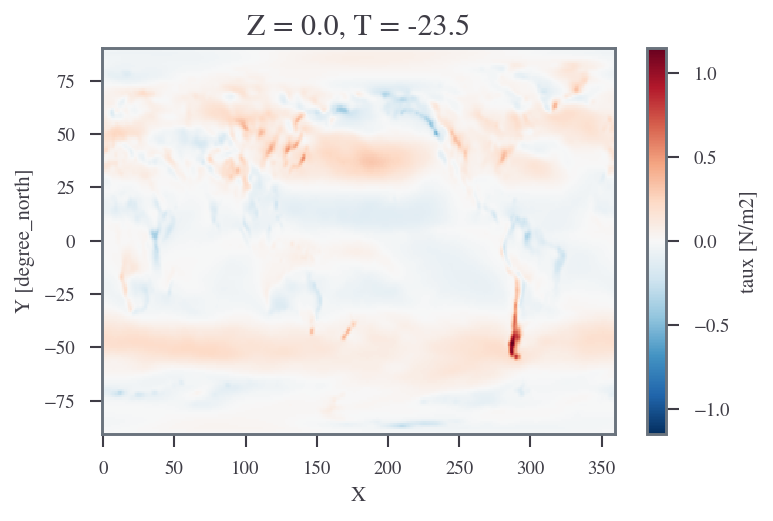

In [20]:
tau_obj.isel(T=0).plot()

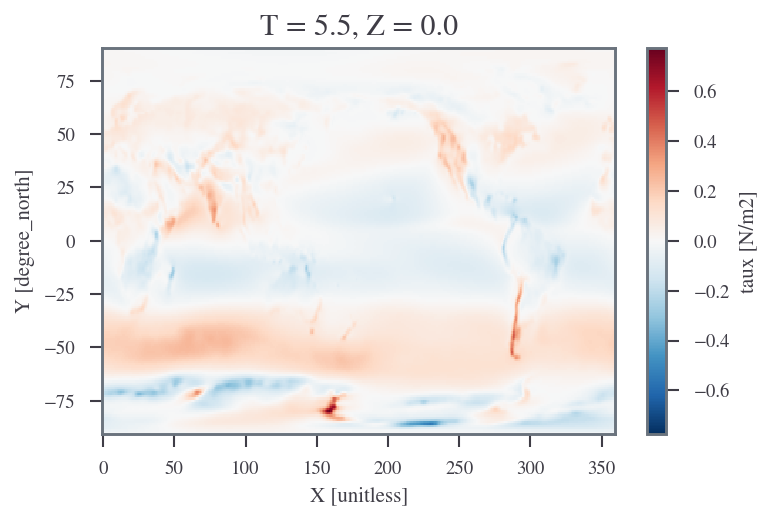

In [22]:
tau_clim_obj.isel(T=5).plot()

In [23]:
print(tau_clim_obj)

<xarray.DataArray 'taux' (T: 12, Z: 1, Y: 181, X: 360)>
[781920 values with dtype=float32]
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 0.0
Attributes:
    units:          N/m2
    dodsname:       taux
    long_name:      taux
    standard_name:  surface_downward_eastward_stress
    longname:       taux
    history:        [(Tue Nov 27 12:35:57 2018: ncpdq -O -a T,Z,Y,X temp.nc t...


In [24]:
tau_clim_obj.to_netcdf("test.nc")

In [26]:
test_nc = xr.open_dataarray("test.nc", decode_times=False)

In [28]:
import recursive_diff

In [31]:
for x in recursive_diff.recursive_diff(test_nc, tau_clim_obj):
    print(x)

In [49]:
tau_clim_obj.to_netcdf("test.x")

In [33]:
str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), "test.x"

('/home/users/sithom/seager19/src/test/test_direc/ocean/DATA/tau-ECMWF-clim.x',
 'test.x')

In [ ]:
with open("test.x", "r+b") as f:
     f.write(chr(10) + chr(20) + chr(30) + chr(40))

In [75]:
with open("test.x", 'r+b') as f:
  bytes = f.read(12)
  print("bytes", bytes)

bytes b'CDF\x01\x00\x00\x00\x00\x00\x00\x00\x00'


In [59]:
with open(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), 'r+b') as f:
  bytes = f.read(10)
  print("bytes", bytes)

bytes b'CDF\x01\x00\x00\x00\x00\x00\x00'


In [20]:
import xarray as xr
from src.constants import TEST_DIREC

tau_clim_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False)
tau_clim_obj.to_netcdf("test.x", format="NETCDF3_CLASSIC")
byte_num = 100

with open(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), "r+b") as f:
    byt1 = f.read(byte_num)
    print(byt1)

with open("test.x", "r+b") as f:
    byt2 = f.read(byte_num)
    print(byt2)

np.all([byt1[x]==byt2[x] for x in range(len(byt1))])

b'CDF\x01\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x04\x00\x00\x00\x01X\x00\x00\x00\x00\x00\x01h\x00\x00\x00\x01T\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x01Y\x00\x00\x00\x00\x00\x00\xb5\x00\x00\x00\x01Z\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x05\x00\x00\x00\x01X\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x0c'
b'CDF\x01\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x04\x00\x00\x00\x01X\x00\x00\x00\x00\x00\x01h\x00\x00\x00\x01T\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x01Y\x00\x00\x00\x00\x00\x00\xb5\x00\x00\x00\x01Z\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x05\x00\x00\x00\x01X\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x0c'


True

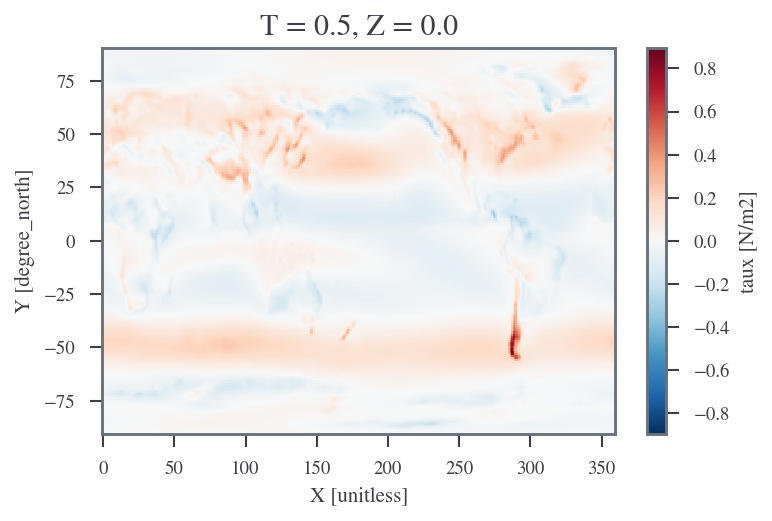

In [25]:
xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False).isel(T=0, Z=0).plot()

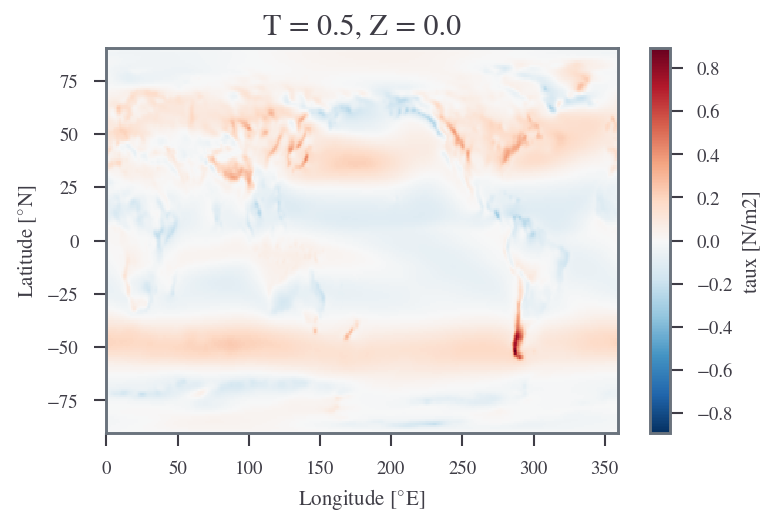

In [30]:
add_units(xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False)).isel(T=0, Z=0).plot()

In [29]:
from src.plot_utils import add_units

In [33]:
os.listdir(str(TEST_DIREC / "atmos" / "DATA"))

['S91-Hq1800-PrcpLand0.nc',
 'S91-hq1800-prcp_land1.nc',
 'S91-Hq1800-PrcpLand1.nc']

In [34]:
os.listdir(str(TEST_DIREC / "atmos"))

['DATA',
 'tmp',
 'prTrend.png',
 'S90-H2000-Stab.eps',
 'S91-hq1800-prcp_land1.nc',
 'Q.nc',
 'Tsp4.eps',
 'dQ.nc']

In [38]:
xr.open_dataset(str(TEST_DIREC / "atmos" / 'Q.nc'))

<xarray.Dataset>
Dimensions:  (X: 360, Y: 181, lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    clt      (lat, lon) float32 ...
    rh       (lat, lon) float32 ...
    sfcWind  (lat, lon) float32 ...
    ts       (lat, lon) float32 ...
    dTse0    (lat, lon) float32 ...
    dTse1    (lat, lon) float32 ...
    dTse2    (lat, lon) float32 ...
    dTse     (lat, lon) float32 ...
    ALH      (lat, lon) float32 ...
    ALW      (lat, lon) float32 ...
    BLW      (lat, lon) float32 ...
    QLW      (lat, lon) float32 ...

In [39]:
xr.open_dataset(str(TEST_DIREC / "atmos" / 'dQ.nc'))

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 360)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
Data variables:
    dq_dt    (lat, lon) float32 ...
    dq_df    (lat, lon) float32 ...
    ALH      (lat, lon) float32 ...
    ALW      (lat, lon) float32 ...
    BLW      (lat, lon) float32 ...
    dTse     (lat, lon) float32 ...
    rh       (lat, lon) float32 ...
    Ub       (lat, lon) float32 ...
    Cb       (lat, lon) float32 ...
    Tsb      (lat, lon) float32 ...

In [41]:
xr.open_dataset(str(TEST_DIREC / "atmos" / "tmp" / 'S91-Hq1800-PrcpLand0.nc'))

<xarray.Dataset>
Dimensions:   (X: 180, Yu: 59, Yv: 60)
Coordinates:
  * X         (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * Yu        (Yu) float64 -58.0 -56.0 -54.0 -52.0 -50.0 ... 52.0 54.0 56.0 58.0
  * Yv        (Yv) float64 -59.0 -57.0 -55.0 -53.0 -51.0 ... 53.0 55.0 57.0 59.0
Data variables: (12/37)
    K         float32 ...
    epsu      float32 ...
    epsv      float32 ...
    Hq        float32 ...
    wnspClim  (Yu, X) float64 ...
    tsClim    (Yu, X) float64 ...
    ...        ...
    tsbeg     (Yu, X) float64 ...
    PRbeg     (Yu, X) float64 ...
    Qthbeg    (Yu, X) float64 ...
    Ebeg      (Yu, X) float64 ...
    MCbeg     (Yu, X) float64 ...
    qabeg     (Yu, X) float64 ...